In [76]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [89]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
train_data.drop(['ID'],axis =1, inplace = True)
test_data.drop(['ID'],axis =1, inplace = True)
out_data = train_data[train_data['class']== -999].index
X_train = train_data.drop(out_data)


Int64Index([1146, 1547, 2019], dtype='int64')

In [90]:
X_train_new = X_train.drop(['class'], axis=1)
y_train = X_train['class']

(4789, 8)

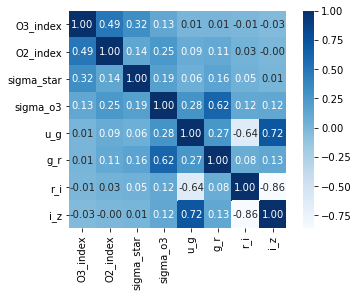

In [80]:
import matplotlib.pyplot as plt 
import seaborn as sns
corr = X_train_new.corr()
df_heatmap = sns.heatmap(corr, cbar = True, annot = True, annot_kws={'size' : 10}, fmt = '.2f', square = True, cmap = 'Blues')


In [81]:

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
LE.fit(y_train)
y_train = LE.transform(y_train)

from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)

In [82]:
X_train_new.shape

(4789, 8)

In [83]:
input_node = 8
hidden_node = [35, 35]
output_node = 4

model = Sequential()
model.add(Dense(hidden_node[0], input_dim = input_node, kernel_initializer = 'normal', activation = 'relu', name = 'Hidden1'))
model.add(Dense(hidden_node[1], activation = 'relu', name = 'Hidden2'))
model.add(Dense(output_node, activation = 'softmax'))

In [84]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = 'accuracy')

In [85]:
model.fit(X_train_new, y_train, epochs = 70, batch_size =10, validation_split = 0.3)

Epoch 1/70
336/336 [==============================] - 1s 2ms/step - loss: 0.9062 - accuracy: 0.6187 - val_loss: 0.6987 - val_accuracy: 0.7328
Epoch 2/70
336/336 [==============================] - 0s 1ms/step - loss: 0.6148 - accuracy: 0.7551 - val_loss: 0.5973 - val_accuracy: 0.7669
Epoch 3/70
336/336 [==============================] - 0s 1ms/step - loss: 0.5566 - accuracy: 0.7807 - val_loss: 0.6087 - val_accuracy: 0.7523
Epoch 4/70
336/336 [==============================] - 0s 1ms/step - loss: 0.5315 - accuracy: 0.7903 - val_loss: 0.5457 - val_accuracy: 0.7731
Epoch 5/70
336/336 [==============================] - 0s 1ms/step - loss: 0.5114 - accuracy: 0.7983 - val_loss: 0.5255 - val_accuracy: 0.7836
Epoch 6/70
336/336 [==============================] - 0s 1ms/step - loss: 0.5007 - accuracy: 0.8037 - val_loss: 0.5158 - val_accuracy: 0.7961
Epoch 7/70
336/336 [==============================] - 0s 1ms/step - loss: 0.4872 - accuracy: 0.8079 - val_loss: 0.5158 - val_accuracy: 0.7933
Epoch 

336/336 [==============================] - 0s 1ms/step - loss: 0.3597 - accuracy: 0.8496 - val_loss: 0.4409 - val_accuracy: 0.8365
Epoch 59/70
336/336 [==============================] - 0s 1ms/step - loss: 0.3591 - accuracy: 0.8544 - val_loss: 0.4450 - val_accuracy: 0.8344
Epoch 60/70
336/336 [==============================] - 1s 2ms/step - loss: 0.3578 - accuracy: 0.8511 - val_loss: 0.4365 - val_accuracy: 0.8309
Epoch 61/70
336/336 [==============================] - 1s 2ms/step - loss: 0.3559 - accuracy: 0.8520 - val_loss: 0.4468 - val_accuracy: 0.8281
Epoch 62/70
336/336 [==============================] - 1s 2ms/step - loss: 0.3543 - accuracy: 0.8508 - val_loss: 0.4455 - val_accuracy: 0.8344
Epoch 63/70
336/336 [==============================] - 1s 2ms/step - loss: 0.3603 - accuracy: 0.8496 - val_loss: 0.4538 - val_accuracy: 0.8302
Epoch 64/70
336/336 [==============================] - 1s 2ms/step - loss: 0.3532 - accuracy: 0.8505 - val_loss: 0.4321 - val_accuracy: 0.8316
Epoch 65/70

In [86]:
y_pred = model.predict(test_data)
print(y_pred)

[[9.14701521e-01 8.52833241e-02 1.50121923e-05 1.17483864e-07]
 [3.01768625e-04 1.51591841e-03 9.96500611e-01 1.68167811e-03]
 [3.37842852e-01 6.60948813e-01 2.27713599e-06 1.20601605e-03]
 ...
 [1.12749338e-04 3.62747023e-03 9.63604748e-01 3.26549709e-02]
 [9.85757828e-01 1.42421816e-02 1.87157689e-09 2.21233947e-08]
 [9.80044663e-01 1.88444573e-02 1.11050683e-03 3.75048813e-07]]


In [87]:
predict_list =y_pred.argmax(axis=1)
for i in range(len(predict_list)):
    predict_list[i] += 1
print(predict_list)

[1 3 2 ... 3 1 1]


In [88]:
ID_list = pd.read_csv("test.csv")['ID']
x = [predict_list]
def submission_csv(predict_list):
    for i in range(len(x)):
        submission = pd.DataFrame({
            "ID":ID_list,
            "class":x[i]
        })   
        submission.to_csv('submission_'+'finaltest'+'.csv', index= False)
        
submission_csv(x)